In [1]:
from fastai.vision.all import *
from fastai.data.transforms import *

In [2]:
path = 'data/'
csv = path + '/labels.csv'
np.random.seed(42)

In [3]:
tubs = [ 'Andrew Kew traffic School/tub_11_19-11-03', 'andrew_zen', 'Buzadaza Town Hall/tub_2_19-07-13', 'Carpark_yellow_rope/tub_9_19-07-20', 'Carpark_yellow_rope/tub_15_19-07-20', 
        'Carpark_yellow_rope/tub_20_19-08-25', 'Kew Traffic School Small Track/tub_27_19-11-04', 'kew_traffic_school-19-12-28/tub_33_19-12-28' 'kew_traffic_school-19-12-28/tub_35_19-12-28'  ]


In [4]:
def load_donkey_tub(path, tubs):
    df = pd.DataFrame({'image': pd.Series([], dtype='str'),
                       'angle': pd.Series([], dtype='float'),
                       'throttle': pd.Series([], dtype='float')})
    for tub in tubs:
        dir = path + tub + '/'
        print("Directory: " + dir)
        for file in glob.glob(dir + '*.json'):
            data = {}
            with open(file, 'r') as fh:
                data = json.load(fh)
                if ('cam/image_array' in data.keys()):
                    image = dir  + data['cam/image_array']
                    angle = float(data['user/angle'])
                    throttle = float(data['user/throttle'])
                    #print(image + ' ' + str(angle) + ' ' + str(throttle))
                    new_row = { 'image':str(image), 'angle':angle, 'throttle':throttle }
                    df = df.append(new_row, ignore_index=True)
                    #print(df.head())
    return df

In [5]:
df = load_donkey_tub(path, tubs)
df.head()


Directory: data/Andrew Kew traffic School/tub_11_19-11-03/
Directory: data/andrew_zen/
Directory: data/Buzadaza Town Hall/tub_2_19-07-13/
Directory: data/Carpark_yellow_rope/tub_9_19-07-20/
Directory: data/Carpark_yellow_rope/tub_15_19-07-20/
Directory: data/Carpark_yellow_rope/tub_20_19-08-25/
Directory: data/Kew Traffic School Small Track/tub_27_19-11-04/
Directory: data/kew_traffic_school-19-12-28/tub_33_19-12-28kew_traffic_school-19-12-28/tub_35_19-12-28/


,image,angle,throttle
0,data/Andrew Kew traffic School/tub_11_19-11-03/1443_cam-image_array_.jpg,-0.000454,0.417823
1,data/Andrew Kew traffic School/tub_11_19-11-03/2625_cam-image_array_.jpg,0.171708,0.508301
2,data/Andrew Kew traffic School/tub_11_19-11-03/9651_cam-image_array_.jpg,0.094192,0.499684
3,data/Andrew Kew traffic School/tub_11_19-11-03/414_cam-image_array_.jpg,-0.118767,0.404898
4,data/Andrew Kew traffic School/tub_11_19-11-03/9713_cam-image_array_.jpg,1.000000,0.495375


In [6]:
cat = Categorize()
tds = Datasets(['cat', 'dog', 'cat'], tfms=[cat])
print(tds)
print(cat.vocab)


(#3) [(TensorCategory(0),),(TensorCategory(1),),(TensorCategory(0),)]
(#2) ['cat','dog']


In [7]:
cat = MultiCategorize()
tds = Datasets([['b', 'c'], ['a'], ['a', 'c'], []], tfms=[cat])
print(tds[3][0])
print(cat.vocab)
print(cat(['a', 'c']))
print(cat([]))
print(cat.decode([1]))
print(cat.decode([0,2]))
print(lambda: show_at(tds,2))

TensorMultiCategory([])
(#3) ['a','b','c']
TensorMultiCategory([0, 2])
TensorMultiCategory([])
(#1) ['b']
(#2) ['a','c']
<function <lambda> at 0x7f8fb0f3c0d0>


In [8]:
class RegressionSetupN(DisplayedTransform):
    "Transform that floatifies targets"
    loss_func,store_attrs=MSELossFlat(),'c'
    def __init__(self, c=None):
        self.c = c

    def encodes(self, o): return tensor(o).float()
    def decodes(self, o): return TitledFloat(o) if o.ndim==0 else TitledTuple(o_.item() for o_ in o)
    def setups(self, dsets):
        if self.c is not None: return
        try: self.c = len(dsets[0]) if hasattr(dsets[0], '__len__') else 1
        except: self.c = 0

# _tfm = RegressionSetupN()
# dsets = Datasets([0, 1, 2], RegressionSetup)
# print(dsets.c)
# print(dsets[0])
_tfm = RegressionSetupN(2)
dsets = Datasets([[[0,2], [1,1], [1,3]], [[3,4, [4,7], [3,5]]]], RegressionSetup(2))
print(dsets.c) #3
print(dsets[0]) # (tensor([0.,1.,2.]),))            

2
(tensor([[0., 2.],
        [1., 1.],
        [1., 3.]]),)


In [9]:
RegressionBlockN = partial(RegressionBlock)

In [10]:
dls = ImageDataLoaders.from_df(df, '', fn_col=0, label_col=[1,2], y_block=RegressionBlock(2))
#dls = ImageDataLoaders.from_df(df, path, fn_col=1, label_col=2)

In [11]:
dls.c

2

In [12]:
dls.cat

(#2) [<bound method L.cat of TfmdLists:                                                                                image  \
30636             data/Carpark_yellow_rope/tub_15_19-07-20/8469_cam-image_array_.jpg   
2359        data/Andrew Kew traffic School/tub_11_19-11-03/6480_cam-image_array_.jpg   
25137              data/Carpark_yellow_rope/tub_9_19-07-20/3800_cam-image_array_.jpg   
45556             data/Carpark_yellow_rope/tub_20_19-08-25/3072_cam-image_array_.jpg   
53781  data/Kew Traffic School Small Track/tub_27_19-11-04/2166_cam-image_array_.jpg   
...                                                                              ...   
8662       data/Andrew Kew traffic School/tub_11_19-11-03/10535_cam-image_array_.jpg   
22397               data/Buzadaza Town Hall/tub_2_19-07-13/1512_cam-image_array_.jpg   
14059                                      data/andrew_zen/4078_cam-image_array_.jpg   
9740        data/Andrew Kew traffic School/tub_11_19-11-03/2498_cam-image_array_

In [13]:
dls.show

<bound method Datasets.show of (#45476) [(PILImage mode=RGB size=160x120, tensor([0.8063, 0.1977])),(PILImage mode=RGB size=160x120, tensor([-0.0617,  0.4652])),(PILImage mode=RGB size=160x120, tensor([-0.7589,  0.1977])),(PILImage mode=RGB size=160x120, tensor([0.4664, 0.1858])),(PILImage mode=RGB size=160x120, tensor([0.5138, 0.1858])),(PILImage mode=RGB size=160x120, tensor([0.0000, 0.1977])),(PILImage mode=RGB size=160x120, tensor([0.0000, 0.1621])),(PILImage mode=RGB size=160x120, tensor([1.0000, 0.1700])),(PILImage mode=RGB size=160x120, tensor([-0.3716,  0.2214])),(PILImage mode=RGB size=160x120, tensor([0.0079, 0.1621]))...]>

In [14]:
x,y = dls.one_batch()
#print(x)
print(y)

tensor([[ 0.3794,  0.2293],
        [-0.0657,  0.4997],
        [ 0.0000,  0.1660],
        [-0.3637,  0.2174],
        [ 0.1146,  0.5040],
        [-0.9626,  0.4095],
        [-0.4615,  0.5126],
        [ 0.0000,  0.1739],
        [ 0.1107,  0.1897],
        [ 0.6877,  0.2135],
        [ 0.0237,  0.1937],
        [ 0.0000,  0.1502],
        [ 0.0000,  0.2293],
        [ 0.7668,  0.2253],
        [ 0.2925,  0.1977],
        [ 0.1921,  0.4997],
        [ 0.0000,  0.1305],
        [ 0.0000,  0.8931],
        [ 1.0000,  0.6141],
        [ 0.0000,  0.4997],
        [ 0.5691,  0.1977],
        [ 0.4585,  0.2016],
        [ 0.2084,  0.4868],
        [ 0.0000,  0.3083],
        [ 0.0000,  0.2490],
        [ 0.5612,  0.1700],
        [-0.2293,  0.1739],
        [ 1.0000,  0.2135],
        [ 0.0000,  0.1937],
        [ 0.0000,  0.0988],
        [ 0.7129,  0.3258],
        [ 0.0000,  0.2806],
        [-0.1555,  0.4911],
        [-0.1423,  0.2332],
        [-1.0000,  0.2174],
        [-0.1188,  0

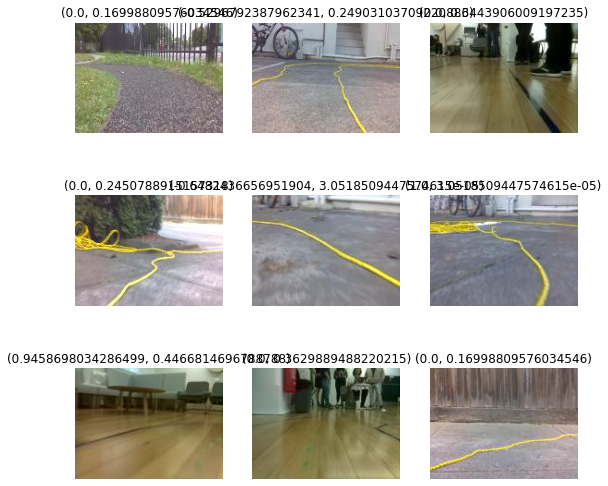

In [15]:
dls.show_batch()

In [16]:
get_c(dls)

2

In [17]:
tst = create_head(5, 2)
tst

Sequential(
  (0): AdaptiveConcatPool2d(
    (ap): AdaptiveAvgPool2d(output_size=1)
    (mp): AdaptiveMaxPool2d(output_size=1)
  )
  (1): Flatten(full=False)
  (2): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (3): Dropout(p=0.25, inplace=False)
  (4): Linear(in_features=5, out_features=512, bias=False)
  (5): ReLU(inplace=True)
  (6): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=512, out_features=2, bias=False)
)

def create_head(nf, n_out, lin_ftrs=None, ps=0.5, concat_pool=True, bn_final=False, lin_first=False, y_range=None):
    "Model head that takes `nf` features, runs through `lin_ftrs`, and out `n_out` classes."
    lin_ftrs = [nf, 512, n_out] if lin_ftrs is None else [nf] + lin_ftrs + [n_out]
    ps = L(ps)
    if len(ps) == 1: ps = [ps[0]/2] * (len(lin_ftrs)-2) + ps
    actns = [nn.ReLU(inplace=True)] * (len(lin_ftrs)-2) + [None]
    pool = AdaptiveConcatPool2d() if concat_pool else nn.AdaptiveAvgPool2d(1)
    layers = [pool, Flatten()]
    if lin_first: layers.append(nn.Dropout(ps.pop(0)))
    for ni,no,p,actn in zip(lin_ftrs[:-1], lin_ftrs[1:], ps, actns):
        layers += LinBnDrop(ni, no, bn=True, p=p, act=actn, lin_first=lin_first)
    if lin_first: layers.append(nn.Linear(lin_ftrs[-2], n_out))
    if bn_final: layers.append(nn.BatchNorm1d(lin_ftrs[-1], momentum=0.01))
    if y_range is not None: layers.append(SigmoidRange(*y_range))
    return nn.Sequential(*layers)

In [18]:
def MSELossFlatN(*args, axis=-1, floatify=True, **kwargs):
    "Same as `nn.MSELoss`, but flattens input and target."
    print(*args, axis, **kwargs)
    return BaseLoss(nn.MSELoss, *args, axis=axis, floatify=floatify, is_2d=False, **kwargs)

In [19]:
#create_head())
#meta = model_meta.get(resnet34, _default_meta)
#create_cnn_model(resnet34, get_c(dls), )

In [20]:
learn = cnn_learner(dls, resnet34, metrics=[accuracy_multi])
learn.summary()
print(learn.loss_func)


FlattenedLoss of MSELoss()


Minimum/10: 8.32e-03, steepest point: 7.59e-07


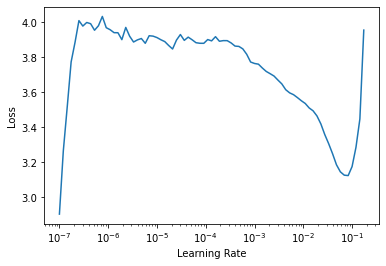

In [23]:
lr_min,lr_steep = learn.lr_find()
print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

In [24]:
learn.fit_one_cycle(7, 8.32e-03)

KeyboardInterrupt: 

In [ ]:
learn.unfreeze()
lr_min,lr_steep = learn.lr_find()

In [ ]:
learn.fine_tune(5, 1e-6)

In [ ]:
#learn.save('donkey_fastai2')

In [ ]:
#learn.load('donkey_fastai2')

In [ ]:
df.iloc[130,:]

In [ ]:
learn.predict(path + df.iloc[1,:][1])

In [ ]:
learn.pred(path + df.iloc[1,:][1])

In [ ]:
learn.show_results()

In [ ]:
learn.recorder.plot_loss()

In [ ]:
import torch
torch.cuda.is_available()